In [8]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-08-03 22:12:21,605: Credentials are already in use. The existing account in the session will be replaced.


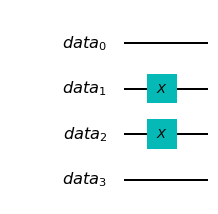

In [52]:
#data and templates are all in binary form and we compare bit by bit
#define data register. Completely arbitrary, n is the number of qubits 
n=4
data = QuantumRegister(n,'data')
#data is 0110 
dataCircuit=QuantumCircuit(data)
dataCircuit.x(data[1])
dataCircuit.x(data[2])
dataCircuit.draw(output="mpl")

In [ ]:
#quantum phase estimation

    #inverse QFT
    def qft_dagger(circ, n):
        """n-qubit QFTdagger the first n qubits in circ"""
        # Don't forget the Swaps!
        for qubit in range(n//2):
            circ.swap(qubit, n-qubit-1)
        for j in range(n):
            for m in range(j):
                circ.cu1(-math.pi/float(2**(j-m)), m, j)
            circ.h(j)
        #phase estimation

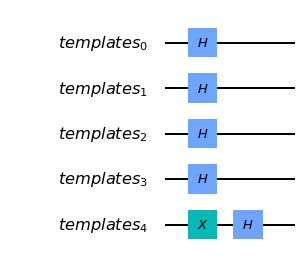

In [53]:
#Grover's Gate
#in order to search through n qubit, you need n+1 qubits

nanc=1
#templates= QuantumRegister(n)
#anc=QuantumRegister(nanc)
a=n+nanc
#the last qubit is the ancilla
templates= QuantumRegister(a,'templates')
grover_circuit = QuantumCircuit(templates)
#search qubits are initialised to 0 while the ancilla is initialised to 1
grover_circuit.x(n)
#Hadmard gate is applied to all qubits
#for qubit in range(na):
 #   grover_circuit.h(qubit)
grover_circuit.h(templates[0:a]) 
grover_circuit.draw(output="mpl")

In [43]:
#unfortunately qiskit does not have ccccx gate so we have to define
#This is good because we dont have to put in number of qubits by hand
from qiskit.circuit.library.standard_gates import XGate
cx_gate = XGate().control(n)

In [54]:
#combine_circuits=QuantumCircuit(templates,data)

In [57]:
#templace matching oracle
#data bit match with template bit
#cx: is a classical AND gate, the result is on the second qubit. 
def template_matching_oracle(templates,data):
    '''
    inputregister is the superposition of templates 
    data is what we are comparing with
    we are comparing bit by bit, and only when all the comparison is positive we should have 1 in the result register
    #qubits = circuit.qubits
    #cr=ClassicalRegister(nqubits)
    #the two registers should have the same number of qubits
    '''
    nqubits = len(templates)-1
    qc=QuantumCircuit(templates,data)
    for qubit in range(nqubits):
        #comparing data with templates qubit by qubit, first is the controll bit
        qc.cx(data[qubit], templates[qubit])
        #cx gives a 0 if they match. so x-gates are needed 
        qc.x(templates[qubit])
    '''
    now is the magic: ancilla qubit which is in the |-> state, with a cccc-x, would if and only if
    adopt a - sign when all bits match
    shame here need to manually change how many control with regard to how many qubits in the template register
    '''
    #qcmin=QuantumCircuit(templates)
    qc.append(cx_gate,templates)
    #qc.ccccx(templates[0:nqubits],ancilla)
    #reverse the previous processes to restore the template register
    for qubit in range(nqubits):
        qc.x(templates[qubit])
        qc.cx(data[qubit], templates[qubit])
    #reverse the ancilla bit
    qc.h(templates[n])
    return (qc)
        

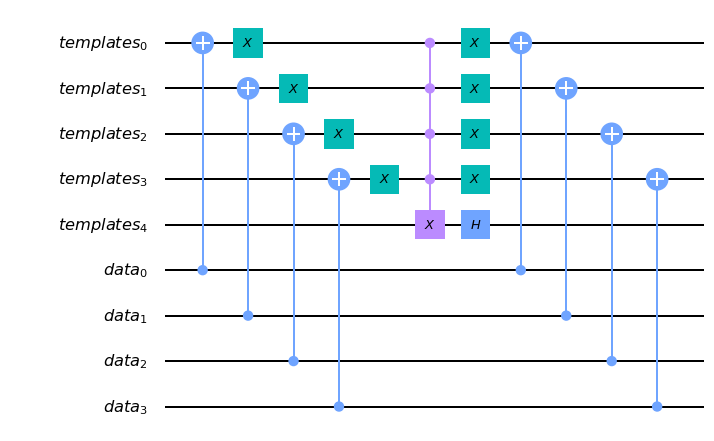

In [56]:
#test oracle
oracle_circuit=QuantumCircuit(templates,data)
oracle_circuit=template_matching_oracle(templates,data)
oracle_circuit.draw(output='mpl')

In [27]:
#diffusion operator
def DiffOpe():
    


SyntaxError: unexpected EOF while parsing (<ipython-input-27-5a4b951eafeb>, line 3)